# Transportstatistikk

In [1]:
from pyjstat import pyjstat
import requests
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Innenlandsk persontransport 1965-2022

### API spørring

In [8]:
POST_URL = 'https://data.ssb.no/api/v0/no/table/03982'

# API spørring, kan tas fra Konsoll  
payload = {
  "query": [
    {
      "code": "PersonTrans",
      "selection": {
        "filter": "all",
        "values": [
          "*"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "all",
        "values": [
            "*"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "all",
        "values": [
            "*"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

### Få resultat fra APIen og lagre som pandas dataframe

In [ ]:
# Post spørring og få Pandas dataframe i retur
# benytter biblioteket pyjstat for JSON-stat

resultat = requests.post(POST_URL, json = payload)
# Resultat gir bare http statuskode - 200 hvis OK. Body ligger i resultat.text
print(resultat)


dataset = pyjstat.Dataset.read(resultat.text)
df = dataset.write('dataframe')
df.to_pickle("person.pkl")


### Lese in pandas dataframe

In [2]:
df = pd.read_pickle("person.pkl")

### Sjekke ting

In [3]:
df.head()

,transport,statistikkvariabel,år,value
0,Persontransport i alt,Passasjerer (mill.),1965,1316.0
1,Persontransport i alt,Passasjerer (mill.),1970,1847.0
2,Persontransport i alt,Passasjerer (mill.),1975,2320.0
3,Persontransport i alt,Passasjerer (mill.),1980,2628.0
4,Persontransport i alt,Passasjerer (mill.),1985,3385.0


In [4]:
print(df['år'].unique())
print(df['transport'].unique())
print(df['statistikkvariabel'].unique())

['1965' '1970' '1975' '1980' '1985' '1990' '1995' '1996' '1997' '1998'
 '1999' '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008'
 '2009' '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018'
 '2019' '2020' '2021' '2022']
['Persontransport i alt' 'Sjøtransport' 'Bilferjeruter' 'Annen rutefart'
 'Skinnegående transport' 'Alle togstrekninger' 'Norges Statsbaner'
 'Andre jernbaner' 'Forstadsbaner og sporveier' 'Veitransport'
 'Rutebusser' 'Drosjer' 'Utleiebiler mv.' 'Personbiler'
 'Motorsykler, mopeder' 'Lufttransport' 'Lufttransport innenriksreiser'
 'Lufttransport mellom norske flyplasser som del av utenlandsreise']
['Passasjerer (mill.)' 'Passasjerkilometer (mill.)']


In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transport           1224 non-null   object 
 1   statistikkvariabel  1224 non-null   object 
 2   år                  1224 non-null   object 
 3   value               1076 non-null   float64
dtypes: float64(1), object(3)
memory usage: 38.4+ KB
None
              value
count   1076.000000
mean    6461.571561
std    16897.808816
min        0.000000
25%       64.500000
50%      457.000000
75%     3423.250000
max    82496.000000


In [6]:
# Sjekke NaN verdier
print(df[df.isna().any(axis=1)])
print(df[df.isna().any(axis=1)]['transport'].unique())

                                              transport  \
340                                 Alle togstrekninger   
341                                 Alle togstrekninger   
342                                 Alle togstrekninger   
343                                 Alle togstrekninger   
344                                 Alle togstrekninger   
...                                                 ...   
1203  Lufttransport mellom norske flyplasser som del...   
1204  Lufttransport mellom norske flyplasser som del...   
1205  Lufttransport mellom norske flyplasser som del...   
1206  Lufttransport mellom norske flyplasser som del...   
1207  Lufttransport mellom norske flyplasser som del...   

              statistikkvariabel    år  value  
340          Passasjerer (mill.)  1965    NaN  
341          Passasjerer (mill.)  1970    NaN  
342          Passasjerer (mill.)  1975    NaN  
343          Passasjerer (mill.)  1980    NaN  
344          Passasjerer (mill.)  1985    NaN  
...

### Passasjerer

In [7]:
df["år_int"] = df["år"].map(lambda x: int(x[:4]))

In [8]:
df.head()

,transport,statistikkvariabel,år,value,år_int
0,Persontransport i alt,Passasjerer (mill.),1965,1316.0,1965
1,Persontransport i alt,Passasjerer (mill.),1970,1847.0,1970
2,Persontransport i alt,Passasjerer (mill.),1975,2320.0,1975
3,Persontransport i alt,Passasjerer (mill.),1980,2628.0,1980
4,Persontransport i alt,Passasjerer (mill.),1985,3385.0,1985


In [9]:
df_pass=df[(df["statistikkvariabel"]=="Passasjerer (mill.)") & (df["år_int"]>2009)]
df_pass=df_pass.pivot(index='år_int', columns='transport', values='value')


In [10]:
df_pass

transport,Alle togstrekninger,Andre jernbaner,Annen rutefart,Bilferjeruter,Drosjer,Forstadsbaner og sporveier,Lufttransport,Lufttransport innenriksreiser,Lufttransport mellom norske flyplasser som del av utenlandsreise,"Motorsykler, mopeder",Norges Statsbaner,Personbiler,Persontransport i alt,Rutebusser,Sjøtransport,Skinnegående transport,Utleiebiler mv.,Veitransport
år_int,,,,,,,,,,,,,,,,,,
2010,NaN,7.0,9.0,40.0,53.0,125.0,12.0,11.0,1.0,161.0,51.0,4198.0,5052.0,314.0,49.0,183.0,83.0,4808.0
2011,NaN,8.0,10.0,42.0,55.0,137.0,13.0,11.0,2.0,165.0,51.0,4267.0,5161.0,322.0,52.0,195.0,93.0,4902.0
2012,NaN,7.0,10.0,43.0,54.0,139.0,13.0,11.0,2.0,168.0,55.0,4316.0,5240.0,332.0,53.0,201.0,103.0,4973.0
2013,NaN,8.0,10.0,42.0,54.0,144.0,13.0,11.0,2.0,171.0,59.0,4369.0,5320.0,340.0,52.0,211.0,110.0,5043.0
2014,NaN,8.0,10.0,43.0,52.0,149.0,14.0,11.0,3.0,174.0,62.0,4470.0,5444.0,344.0,53.0,219.0,119.0,5158.0
2015,NaN,8.0,11.0,43.0,51.0,160.0,13.0,10.0,3.0,176.0,65.0,4590.0,5600.0,356.0,55.0,233.0,125.0,5299.0
2016,NaN,8.0,12.0,43.0,49.0,171.0,13.0,10.0,3.0,179.0,66.0,4630.0,5672.0,369.0,55.0,245.0,133.0,5359.0
2017,NaN,8.0,12.0,44.0,48.0,182.0,13.0,10.0,3.0,174.0,65.0,4089.0,5128.0,396.0,56.0,255.0,98.0,4804.0
2018,NaN,8.0,12.0,44.0,49.0,189.0,14.0,10.0,4.0,169.0,69.0,4100.0,5167.0,404.0,56.0,266.0,109.0,4831.0


In [11]:
df_pass.describe()

transport,Alle togstrekninger,Andre jernbaner,Annen rutefart,Bilferjeruter,Drosjer,Forstadsbaner og sporveier,Lufttransport,Lufttransport innenriksreiser,Lufttransport mellom norske flyplasser som del av utenlandsreise,"Motorsykler, mopeder",Norges Statsbaner,Personbiler,Persontransport i alt,Rutebusser,Sjøtransport,Skinnegående transport,Utleiebiler mv.,Veitransport
count,4.000000,9.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,9.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,57.500000,7.777778,10.384615,40.307692,49.153846,151.923077,12.153846,9.846154,2.384615,168.153846,60.333333,4235.846154,5203.538462,353.461538,50.769231,216.769231,117.461538,4923.923077
std,18.806027,0.440959,1.445595,4.939376,5.727800,26.961273,2.154304,1.573010,1.043908,6.517236,6.689544,237.064283,281.648899,42.511989,6.139406,38.520890,21.689534,253.340832
min,41.000000,7.000000,8.000000,28.000000,35.000000,110.000000,7.000000,6.000000,1.000000,156.000000,51.000000,3821.000000,4634.000000,290.000000,36.000000,153.000000,83.000000,4439.000000
25%,42.500000,8.000000,10.000000,40.000000,49.000000,137.000000,12.000000,10.000000,2.000000,164.000000,55.000000,4100.000000,5128.000000,322.000000,49.000000,195.000000,103.000000,4808.000000
50%,54.500000,8.000000,10.000000,43.000000,50.000000,149.000000,13.000000,10.000000,2.000000,168.000000,62.000000,4198.000000,5183.000000,344.000000,53.000000,219.000000,118.000000,4896.000000
75%,69.500000,8.000000,12.000000,43.000000,53.000000,171.000000,13.000000,11.000000,3.000000,174.000000,65.000000,4369.000000,5320.000000,387.000000,55.000000,245.000000,129.000000,5043.000000
max,80.000000,8.000000,12.000000,44.000000,55.000000,192.000000,14.000000,11.000000,4.000000,179.000000,69.000000,4630.000000,5672.000000,434.000000,56.000000,272.000000,161.000000,5359.000000


In [12]:
#df_pass['Skinnegående transport']+df_pass['Lufttransport']+df_pass['Veitransport']+df_pass['Sjøtransport']==df_pass['Persontransport i alt']

In [13]:
print(df_pass['Skinnegående transport']+df_pass['Lufttransport']+df_pass['Veitransport']+df_pass['Sjøtransport']-df_pass['Persontransport i alt'])

år_int
2010    0.0
2011    1.0
2012    0.0
2013   -1.0
2014    0.0
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019   -1.0
2020    1.0
2021    0.0
2022    1.0
dtype: float64


<Axes: xlabel='år_int', ylabel='Lufttransport'>

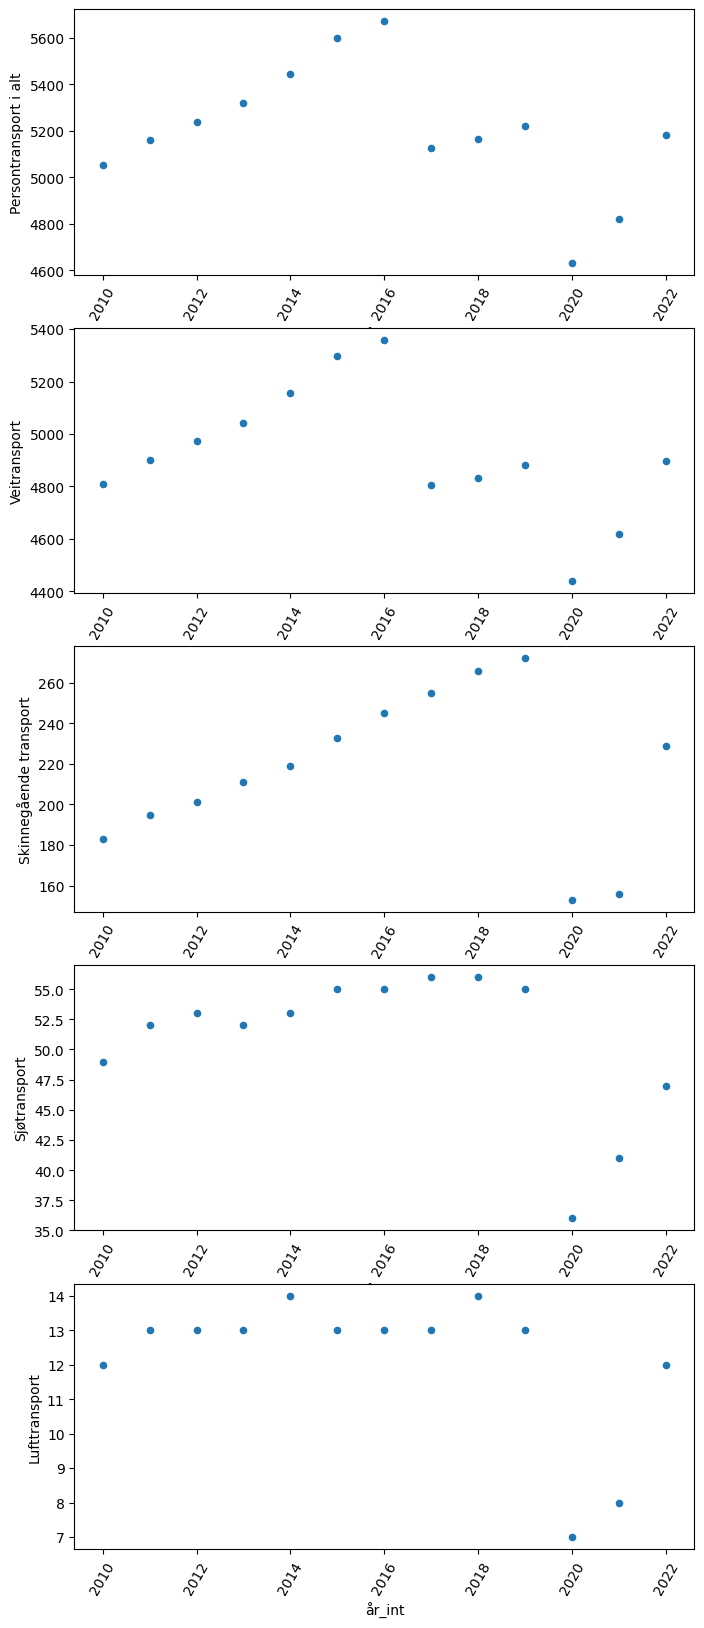

In [14]:
fig, ax = plt.subplots(5,1, figsize = (8, 20))
df_pass.reset_index().plot(ax = ax[0], kind='scatter',x='år_int', y='Persontransport i alt', rot=60)
df_pass.reset_index().plot(ax = ax[1], kind='scatter',x='år_int', y='Veitransport', rot=60)
df_pass.reset_index().plot(ax = ax[2], kind='scatter',x='år_int', y='Skinnegående transport', rot=60)
df_pass.reset_index().plot(ax = ax[3], kind='scatter',x='år_int', y='Sjøtransport', rot=60)
df_pass.reset_index().plot(ax = ax[4], kind='scatter',x='år_int', y='Lufttransport', rot=60)

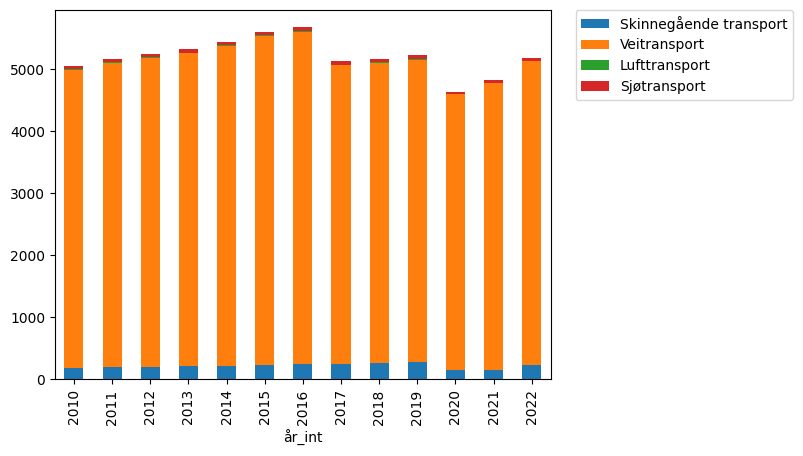

In [15]:
df_pass[["Skinnegående transport","Veitransport","Lufttransport", "Sjøtransport"]].plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

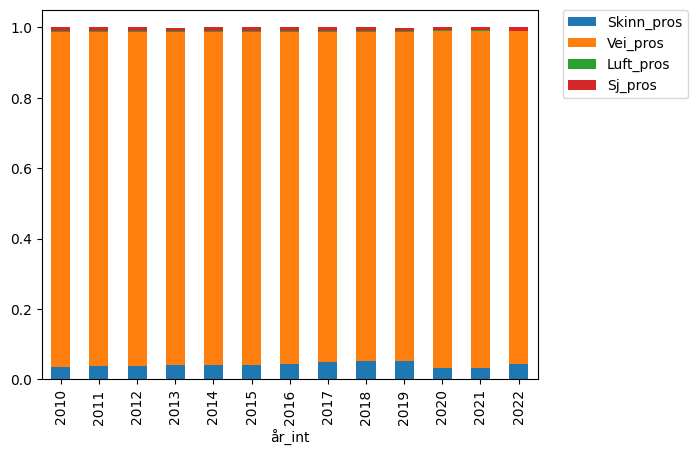

In [16]:
df_pass["Skinn_pros"]=df_pass["Skinnegående transport"]/df_pass['Persontransport i alt']
df_pass["Vei_pros"]=df_pass["Veitransport"]/df_pass['Persontransport i alt']
df_pass["Luft_pros"]=df_pass["Lufttransport"]/df_pass['Persontransport i alt']
df_pass["Sj_pros"]=df_pass["Sjøtransport"]/df_pass['Persontransport i alt']

df_pass.head()
df_pass[["Skinn_pros", "Vei_pros", "Luft_pros", "Sj_pros"]].plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

### Personkm

In [17]:
df_pkm=df[(df["statistikkvariabel"]=="Passasjerkilometer (mill.)") & (df['år_int']>2009)]
df_pkm=df_pkm.pivot(index='år_int', columns='transport', values='value')

In [18]:
df_pkm

transport,Alle togstrekninger,Andre jernbaner,Annen rutefart,Bilferjeruter,Drosjer,Forstadsbaner og sporveier,Lufttransport,Lufttransport innenriksreiser,Lufttransport mellom norske flyplasser som del av utenlandsreise,"Motorsykler, mopeder",Norges Statsbaner,Personbiler,Persontransport i alt,Rutebusser,Sjøtransport,Skinnegående transport,Utleiebiler mv.,Veitransport
år_int,,,,,,,,,,,,,,,,,,
2010,NaN,397.0,591.0,338.0,545.0,620.0,5182.0,4563.0,619.0,1364.0,2666.0,57087.0,73876.0,3887.0,929.0,3683.0,1199.0,64081.0
2011,NaN,371.0,628.0,347.0,532.0,631.0,5544.0,4795.0,749.0,1404.0,2641.0,58029.0,75268.0,3798.0,975.0,3644.0,1342.0,65105.0
2012,NaN,369.0,629.0,350.0,516.0,660.0,5656.0,4710.0,945.0,1442.0,2673.0,58701.0,76261.0,3778.0,979.0,3703.0,1487.0,65924.0
2013,NaN,394.0,651.0,349.0,512.0,729.0,5845.0,4896.0,949.0,1478.0,2821.0,59420.0,77504.0,3711.0,1000.0,3943.0,1595.0,66716.0
2014,NaN,439.0,654.0,358.0,453.0,752.0,5918.0,4738.0,1180.0,1513.0,2957.0,60794.0,79350.0,3793.0,1012.0,4148.0,1720.0,68272.0
2015,NaN,430.0,639.0,361.0,444.0,809.0,5753.0,4494.0,1260.0,1557.0,3079.0,62421.0,81384.0,4073.0,1000.0,4318.0,1818.0,70313.0
2016,NaN,407.0,720.0,353.0,436.0,883.0,5697.0,4275.0,1421.0,1604.0,3238.0,62974.0,82496.0,4259.0,1073.0,4527.0,1926.0,71200.0
2017,NaN,418.0,778.0,362.0,426.0,958.0,5812.0,4293.0,1519.0,1537.0,3111.0,55611.0,74589.0,4158.0,1141.0,4487.0,1417.0,63149.0
2018,NaN,434.0,832.0,360.0,438.0,996.0,5918.0,4311.0,1608.0,1534.0,3250.0,55763.0,75402.0,4296.0,1191.0,4680.0,1581.0,63613.0


In [19]:
df_pkm.describe()

transport,Alle togstrekninger,Andre jernbaner,Annen rutefart,Bilferjeruter,Drosjer,Forstadsbaner og sporveier,Lufttransport,Lufttransport innenriksreiser,Lufttransport mellom norske flyplasser som del av utenlandsreise,"Motorsykler, mopeder",Norges Statsbaner,Personbiler,Persontransport i alt,Rutebusser,Sjøtransport,Skinnegående transport,Utleiebiler mv.,Veitransport
count,4.000000,9.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,9.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,2577.250000,406.555556,650.230769,335.307692,450.461538,758.153846,5270.000000,4226.692308,1043.384615,1510.076923,2937.333333,57607.230769,75185.153846,3793.615385,985.538462,3866.230769,1702.000000,65063.461538
std,945.319479,26.005341,145.902452,38.880982,66.566527,161.002508,991.841301,702.128951,436.640115,71.116643,245.870393,3226.172814,5014.944082,520.241376,179.376055,776.750835,316.282311,3517.092422
min,1779.000000,369.000000,307.000000,226.000000,312.000000,530.000000,2876.000000,2499.000000,334.000000,1364.000000,2641.000000,51959.000000,64282.000000,2841.000000,533.000000,2328.000000,1199.000000,58545.000000
25%,1793.250000,394.000000,628.000000,338.000000,436.000000,631.000000,5182.000000,4197.000000,749.000000,1478.000000,2673.000000,55763.000000,73996.000000,3711.000000,975.000000,3683.000000,1487.000000,63613.000000
50%,2427.000000,407.000000,651.000000,349.000000,444.000000,729.000000,5697.000000,4311.000000,1011.000000,1534.000000,2957.000000,57087.000000,75402.000000,3798.000000,1000.000000,3943.000000,1716.000000,64205.000000
75%,3211.000000,430.000000,755.000000,358.000000,512.000000,883.000000,5812.000000,4710.000000,1421.000000,1557.000000,3111.000000,59420.000000,77504.000000,4158.000000,1098.000000,4487.000000,1872.000000,66716.000000
max,3676.000000,439.000000,832.000000,362.000000,545.000000,1001.000000,5918.000000,4896.000000,1608.000000,1604.000000,3250.000000,62974.000000,82496.000000,4550.000000,1191.000000,4680.000000,2329.000000,71200.000000


<Axes: xlabel='år_int', ylabel='Lufttransport'>

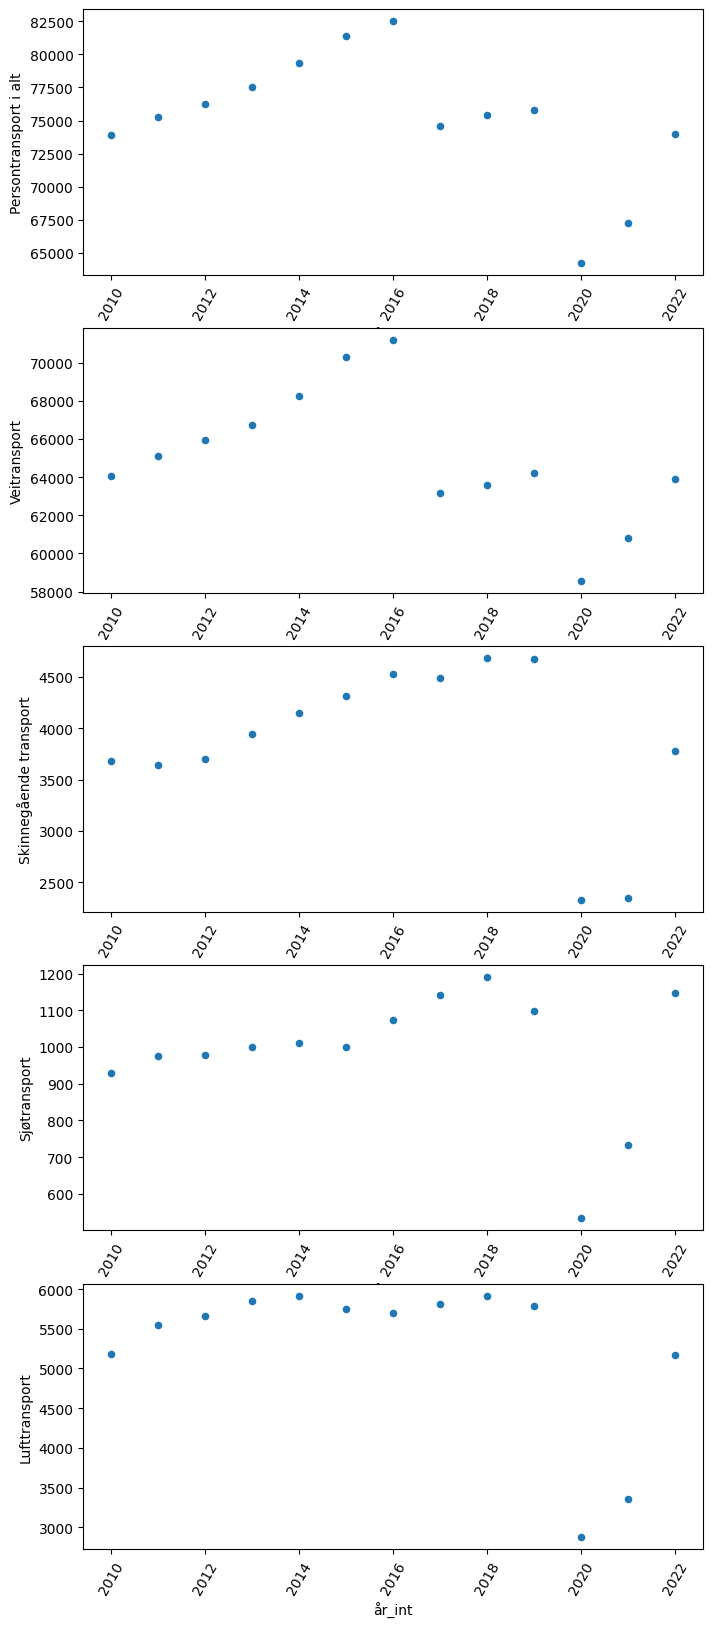

In [20]:
fig, ax = plt.subplots(5,1, figsize = (8, 20))
df_pkm.reset_index().plot(ax = ax[0], kind='scatter',x='år_int', y='Persontransport i alt', rot=60)
df_pkm.reset_index().plot(ax = ax[1], kind='scatter',x='år_int', y='Veitransport', rot=60)
df_pkm.reset_index().plot(ax = ax[2], kind='scatter',x='år_int', y='Skinnegående transport', rot=60)
df_pkm.reset_index().plot(ax = ax[3], kind='scatter',x='år_int', y='Sjøtransport', rot=60)
df_pkm.reset_index().plot(ax = ax[4], kind='scatter',x='år_int', y='Lufttransport', rot=60)

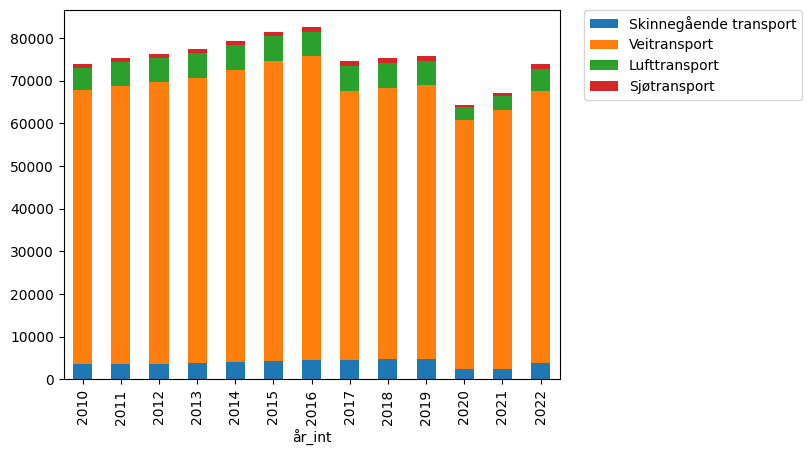

In [21]:
df_pkm[["Skinnegående transport","Veitransport","Lufttransport", "Sjøtransport"]].plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

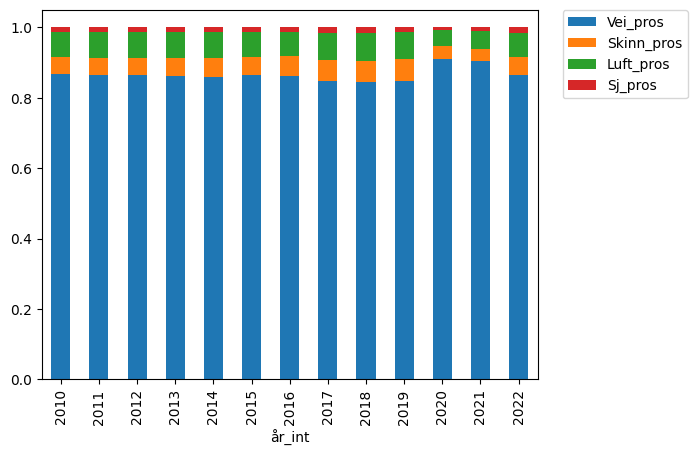

In [22]:
df_pkm["Skinn_pros"]=df_pkm["Skinnegående transport"]/df_pkm['Persontransport i alt']
df_pkm["Vei_pros"]=df_pkm["Veitransport"]/df_pkm['Persontransport i alt']
df_pkm["Luft_pros"]=df_pkm["Lufttransport"]/df_pkm['Persontransport i alt']
df_pkm["Sj_pros"]=df_pkm["Sjøtransport"]/df_pkm['Persontransport i alt']

df_pkm[["Vei_pros", "Skinn_pros", "Luft_pros", "Sj_pros"]].plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

### Presentasjonen

#### Persontransport i alt

In [44]:
difs = df_pass["Persontransport i alt"].diff() 
difs_percent = df_pass["Persontransport i alt"].pct_change()
print(difs_percent*100)
print((df_pass.at[2022, "Persontransport i alt"]-df_pass.at[2019, "Persontransport i alt"])/df_pass.at[2019, "Persontransport i alt"]*100)

år_int
2010          NaN
2011     2.157561
2012     1.530711
2013     1.526718
2014     2.330827
2015     2.865540
2016     1.285714
2017    -9.590973
2018     0.760530
2019     1.083801
2020   -11.277044
2021     4.056970
2022     7.486520
Name: Persontransport i alt, dtype: float64
-0.7658433850277618


In [23]:
# Hva er veksten/nedgangen i prosent fra år til år?
#for i in range(1,len(df_pkm)):
#    dif = df_pkm["Persontransport i alt"]

difs = df_pkm["Persontransport i alt"].diff() 
difs_percent = df_pkm["Persontransport i alt"].pct_change()
print(difs_percent*100)




år_int
2010          NaN
2011     1.884238
2012     1.319286
2013     1.629929
2014     2.381813
2015     2.563327
2016     1.366362
2017    -9.584707
2018     1.089973
2019     0.486724
2020   -15.160554
2021     4.586043
2022    10.063960
Name: Persontransport i alt, dtype: float64


In [24]:
print(df_pkm.at[2022, "Persontransport i alt"])
print(df_pkm.at[2019, "Persontransport i alt"])
print((df_pkm.at[2022, "Persontransport i alt"]-df_pkm.at[2019, "Persontransport i alt"])/df_pkm.at[2019, "Persontransport i alt"]*100)


73996.0
75769.0
-2.3400071269252596


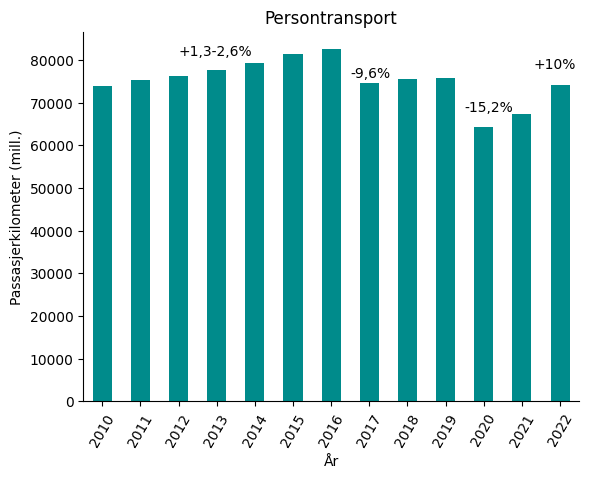

In [142]:
fig, ax = plt.subplots(1,1)
colors=['#008b8b']
df_pkm.reset_index().plot(ax=ax, kind='bar',x='år_int', y='Persontransport i alt', rot=60, color=colors)
ax.text(2, 81000, "+1,3-2,6%")
ax.text(6.5, 76000, "-9,6%")
ax.text(9.5, 68000, "-15,2%")
ax.text(11.3, 78000, "+10%")
ax.set_xlabel("År")
ax.set_ylabel("Passasjerkilometer (mill.)")
ax.get_legend().remove()
ax.set_title("Persontransport")
ax.spines[['right', 'top']].set_visible(False)

fig.savefig("img/Persontransport_pkm.jpg")

#### Reisemater andeler

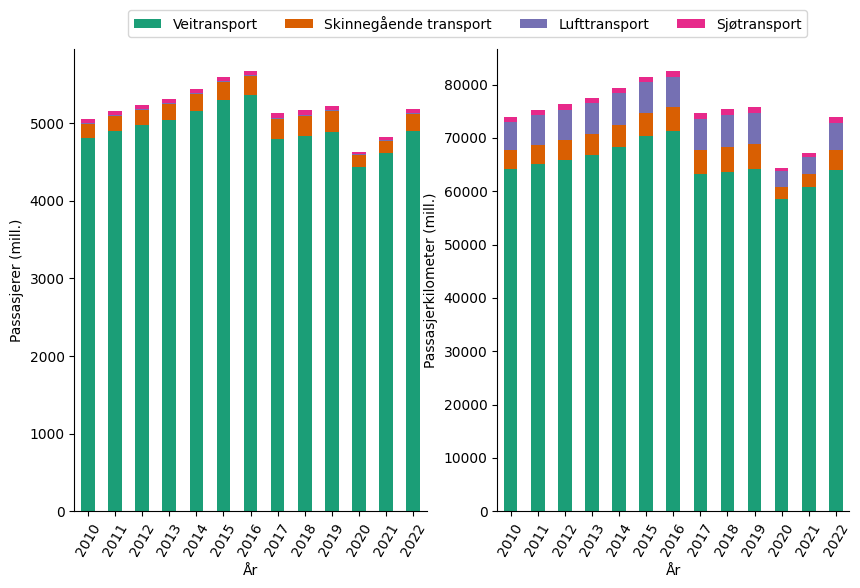

In [43]:
# Hvordan folk reiser?
fig, ax = plt.subplots(1,2, figsize=(10,6))
colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a']
df_pass[["Veitransport","Skinnegående transport","Lufttransport", "Sjøtransport"]].plot(ax=ax[0], kind='bar', stacked=True, legend=None, color=colors, rot=60)
df_pkm[["Veitransport","Skinnegående transport","Lufttransport", "Sjøtransport"]].plot(ax=ax[1], kind='bar', stacked=True, color=colors, rot=60)
#plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.legend(bbox_to_anchor=(0.9,1.1), ncol=4)
for i in range(2):
    ax[i].set_xlabel("År")
    ax[i].spines[['right', 'top']].set_visible(False)
ax[0].set_ylabel("Passasjerer (mill.)")
ax[1].set_ylabel("Passasjerkilometer (mill.)")

fig.savefig("img/Reisemater.jpg")

In [27]:
df_pkm/df_pass

transport,Alle togstrekninger,Andre jernbaner,Annen rutefart,Bilferjeruter,Drosjer,Forstadsbaner og sporveier,Lufttransport,Lufttransport innenriksreiser,Lufttransport mellom norske flyplasser som del av utenlandsreise,"Motorsykler, mopeder",...,Persontransport i alt,Rutebusser,Sjøtransport,Skinnegående transport,Utleiebiler mv.,Veitransport,Skinn_pros,Vei_pros,Luft_pros,Sj_pros
år_int,,,,,,,,,,,,,,,,,,,,,
2010,NaN,56.714286,65.666667,8.450000,10.283019,4.960000,431.833333,414.818182,619.000000,8.472050,...,14.623120,12.378981,18.959184,20.125683,14.445783,13.327995,1.376292,0.911433,29.530863,1.296521
2011,NaN,46.375000,62.800000,8.261905,9.672727,4.605839,426.461538,435.909091,374.500000,8.509091,...,14.583995,11.795031,18.750000,18.687179,14.430108,13.281314,1.281348,0.910677,29.241749,1.285656
2012,NaN,52.714286,62.900000,8.139535,9.555556,4.748201,435.076923,428.181818,472.500000,8.583333,...,14.553626,11.379518,18.471698,18.422886,14.436893,13.256384,1.265862,0.910865,29.894744,1.269216
2013,NaN,49.250000,65.100000,8.309524,9.481481,5.062500,449.615385,445.090909,474.500000,8.643275,...,14.568421,10.914706,19.230769,18.687204,14.500000,13.229427,1.282720,0.908089,30.862328,1.320031
2014,NaN,54.875000,65.400000,8.325581,8.711538,5.046980,422.714286,430.727273,393.333333,8.695402,...,14.575680,11.026163,19.094340,18.940639,14.453782,13.236138,1.299469,0.908097,29.001343,1.310014
2015,NaN,53.750000,58.090909,8.395349,8.705882,5.056250,442.538462,449.400000,420.000000,8.846591,...,14.532857,11.441011,18.181818,18.532189,14.544000,13.269107,1.275192,0.913042,30.450892,1.251084
2016,NaN,50.875000,60.000000,8.209302,8.897959,5.163743,438.230769,427.500000,473.666667,8.960894,...,14.544429,11.542005,19.509091,18.477551,14.481203,13.286061,1.270421,0.913481,30.130490,1.341345
2017,NaN,52.250000,64.833333,8.227273,8.875000,5.263736,447.076923,429.300000,506.333333,8.833333,...,14.545437,10.500000,20.375000,17.596078,14.459184,13.145087,1.209732,0.903726,30.736576,1.400783
2018,NaN,54.250000,69.333333,8.181818,8.938776,5.269841,422.714286,431.100000,402.000000,9.076923,...,14.592994,10.633663,21.267857,17.593985,14.504587,13.167667,1.205646,0.902328,28.966933,1.457402


In [28]:
(df_pkm/df_pass).describe()
# folk reiser gjennomsnittlig per tur
# 430 km med fly
# 14 km/tur
# 19 km på sjøen
# 18 km på skinn
# 13 km på veiene

transport,Alle togstrekninger,Andre jernbaner,Annen rutefart,Bilferjeruter,Drosjer,Forstadsbaner og sporveier,Lufttransport,Lufttransport innenriksreiser,Lufttransport mellom norske flyplasser som del av utenlandsreise,"Motorsykler, mopeder",...,Persontransport i alt,Rutebusser,Sjøtransport,Skinnegående transport,Utleiebiler mv.,Veitransport,Skinn_pros,Vei_pros,Luft_pros,Sj_pros
count,4.000000,9.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,44.364307,52.339286,62.011888,8.327931,9.140706,4.967006,432.465518,428.859241,442.333333,8.986850,...,14.439861,10.753264,19.300964,17.768894,14.486410,13.212308,1.229383,0.915215,29.949652,1.336052
std,2.139016,3.134895,8.468718,0.290602,0.466822,0.250235,11.885712,10.628790,76.005239,0.437780,...,0.251290,1.054700,2.168091,1.478688,0.041748,0.075424,0.084804,0.014898,0.645913,0.145166
min,41.813953,46.375000,38.375000,7.976744,8.705882,4.475309,410.857143,414.818182,334.000000,8.472050,...,13.871817,8.467700,14.805556,15.006410,14.430108,13.050858,1.076319,0.902328,28.966933,1.067312
25%,42.996171,50.875000,60.000000,8.181818,8.875000,4.818182,422.714286,419.700000,393.333333,8.643275,...,14.506797,10.483871,18.471698,17.194853,14.453782,13.167667,1.185296,0.908089,29.530863,1.282284
50%,44.670122,52.714286,62.916667,8.261905,8.914286,5.046980,431.833333,429.300000,420.000000,8.846591,...,14.545437,10.914706,19.094340,18.422886,14.481203,13.229427,1.265862,0.910865,30.043362,1.310014
75%,46.038258,54.250000,65.400000,8.395349,9.481481,5.163743,442.538462,431.142857,474.500000,9.296970,...,14.575680,11.441011,19.963636,18.687179,14.511628,13.269107,1.281348,0.913481,30.450892,1.376157
max,46.303030,56.714286,74.363636,9.138889,10.283019,5.269841,449.615385,449.400000,619.000000,9.719512,...,14.623120,12.378981,24.425532,20.125683,14.547945,13.327995,1.376292,0.950761,30.862328,1.710870


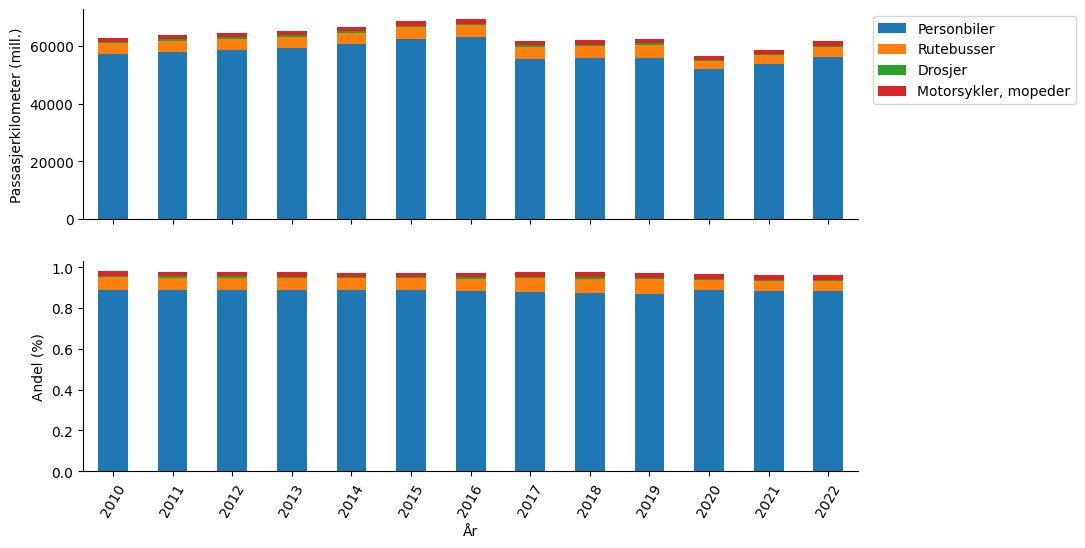

In [80]:
# Hva inngår i veitransport

df_pkm["personbiler_pros"]=df_pkm["Personbiler"]/df_pkm['Veitransport']
df_pkm["rutebusser_pros"]=df_pkm["Rutebusser"]/df_pkm['Veitransport']
df_pkm["drosjer_pros"]=df_pkm["Drosjer"]/df_pkm['Veitransport']
df_pkm["motorsykler_pros"]=df_pkm["Motorsykler, mopeder"]/df_pkm['Veitransport']
df_pkm["annen_pros"]=df_pkm["Annen rutefart"]/df_pkm['Veitransport']

fig, ax = plt.subplots(2,1, figsize=(10,6), sharex=True)
#colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a']
df_pkm[["Personbiler","Rutebusser", "Drosjer","Motorsykler, mopeder"]].plot(ax=ax[0], kind='bar', stacked=True)
ax[0].legend(bbox_to_anchor=(1.01,1), ncol=1)
df_pkm[["personbiler_pros", "rutebusser_pros", "drosjer_pros", "motorsykler_pros"]].plot(ax=ax[1], kind='bar', stacked=True, legend=None,  rot=60)


ax[0].set_xlabel("År")
ax[1].set_xlabel("År")
ax[0].spines[['right', 'top']].set_visible(False)
ax[1].spines[['right', 'top']].set_visible(False)
ax[0].set_ylabel("Passasjerkilometer (mill.)")
ax[1].set_ylabel("Andel (%)")

fig.savefig("img/Veitransport.jpg")

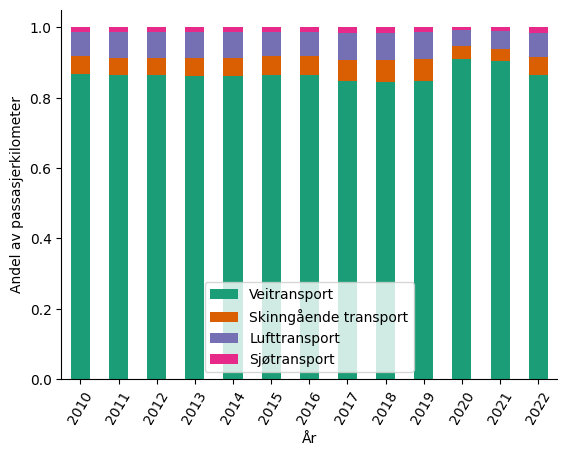

In [123]:
# Andel av de forskjellige reisemater


fig, ax = plt.subplots(1,1)
colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a']
df_pkm[["Vei_pros", "Skinn_pros", "Luft_pros", "Sj_pros"]].plot(ax=ax, kind='bar', stacked=True, rot=60, color=colors)
ax.set_xlabel("År")
ax.set_ylabel("Andel av passasjerkilometer")
handles,labels = ax.get_legend_handles_labels()
labels = ["Veitransport", "Skinngående transport", "Lufttransport", "Sjøtransport"]
ax.legend(handles,labels)
#plt.legend(bbox_to_anchor=(0.9,1.1), ncol=4)
#plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
#ax.set_title("Persontransport")
ax.spines[['right', 'top']].set_visible(False)

fig.savefig("img/Reisemater_andel.jpg")

In [126]:
df_pkm.loc[2022]

transport
Alle togstrekninger                                                  3056.000000
Andre jernbaner                                                              NaN
Annen rutefart                                                        818.000000
Bilferjeruter                                                         329.000000
Drosjer                                                               436.000000
Forstadsbaner og sporveier                                            725.000000
Lufttransport                                                        5169.000000
Lufttransport innenriksreiser                                        4158.000000
Lufttransport mellom norske flyplasser som del av utenlandsreise     1011.000000
Motorsykler, mopeder                                                 1510.000000
Norges Statsbaner                                                            NaN
Personbiler                                                         56345.000000
Persontransport i 

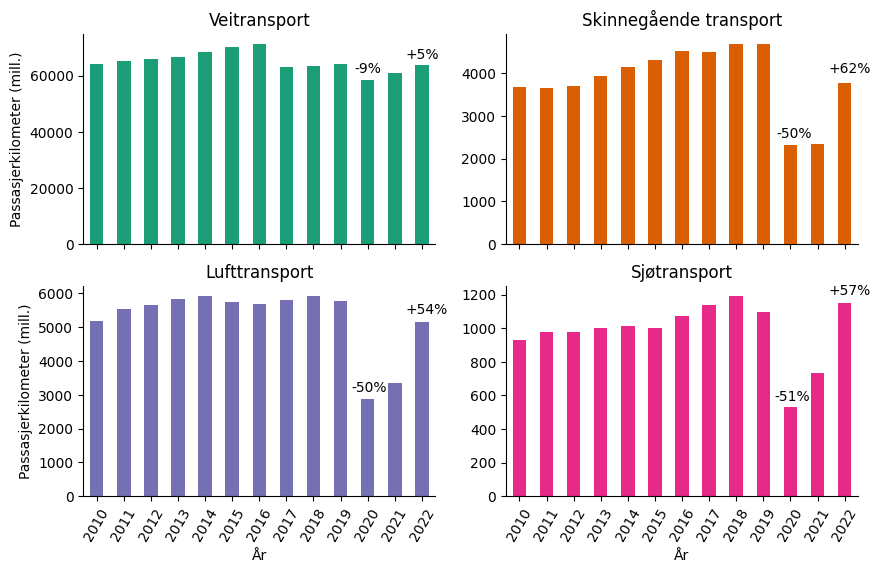

In [139]:
fig, ax = plt.subplots(2,2, figsize=(10,6), sharex=True)
colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a']

df_pkm['Veitransport'].plot(ax = ax[0,0], kind='bar', rot=60, color=colors[0])
df_pkm['Skinnegående transport'].plot(ax = ax[0,1], kind='bar', rot=60, color=colors[1])
df_pkm["Lufttransport"].plot(ax = ax[1,0], kind='bar', rot=60, color=colors[2])
df_pkm['Sjøtransport'].plot(ax = ax[1,1], kind='bar', rot=60, color=colors[3])

ax[0,0].text(9.5, 61000, "-9%")
ax[0,0].text(11.4, 66000, "+5%")
ax[0,1].text(9.5, 2500, "-50%")
ax[0,1].text(11.4, 4000, "+62%")
ax[1,0].text(9.4, 3100, "-50%")
ax[1,0].text(11.4, 5400, "+54%")
ax[1,1].text(9.4, 570, "-51%")
ax[1,1].text(11.4, 1200, "+57%")

for i in range(2):
    for j in range(2):
        ax[i,j].set_xlabel("År")
        ax[i,j].spines[['right', 'top']].set_visible(False)
ax[0,0].set_ylabel("Passasjerkilometer (mill.)")
ax[1,0].set_ylabel("Passasjerkilometer (mill.)")
ax[0,0].set_title("Veitransport")
ax[0,1].set_title("Skinnegående transport")
ax[1,0].set_title("Lufttransport")
ax[1,1].set_title("Sjøtransport")


fig.savefig("img/Reisemater_for_seg.jpg")


In [141]:
(df_pkm.loc[2020]-df_pkm.loc[2019])/(df_pkm.loc[2019])*100

transport
Alle togstrekninger                                                -51.088139
Andre jernbaner                                                           NaN
Annen rutefart                                                     -59.337748
Bilferjeruter                                                      -34.110787
Drosjer                                                            -30.820399
Forstadsbaner og sporveier                                         -47.052947
Lufttransport                                                      -50.319572
Lufttransport innenriksreiser                                      -40.457470
Lufttransport mellom norske flyplasser som del av utenlandsreise   -76.319095
Motorsykler, mopeder                                                 1.694915
Norges Statsbaner                                                         NaN
Personbiler                                                         -7.139793
Persontransport i alt                                 